# With Dec=5e-10,5e-12, and others with Andrew's value

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;
from scipy.io import savemat,loadmat;from pybamm import constants,exp,tanh,sqrt;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import traceback
import imageio.v2 as imageio


In [2]:
import sys  
str_path_0 = os.path.abspath(os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip\Rio_Code\Fun_P3"))
sys.path.append(str_path_1) 
from Fun_P3 import (
    PlotDynamics,
    Plot_Loc_Var,
    Plot_Loc_Var_sol,
    Plot_Single_Static,
)

In [3]:
V_max = 4.2;        V_min = 2.5;
total_cycle = 500; save_at_cycles= 1
Experiment_short   = pybamm.Experiment( [ (
    f"Discharge at 1 C until {V_min} V", 
    f"Charge at 1 C until {V_max} V", 
    f"Hold at {V_max} V until C/5")    ] * 1 ) 
Experiment_s   = pybamm.Experiment( [ (
    f"Discharge at 1 C for 240 s", )    ] * 1 )   

In [4]:
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R7/'; 
Target  = 'a1_3_dd_Dec/'
if not os.path.exists(BasicPath + Target):
    os.mkdir(BasicPath + Target);

In [5]:
model = pybamm.lithium_ion.DFN(     
    options={  
        "solvent diffusion": "EC wo refill"     } )
Dec_all = [5e-10,2e-11,5e-12]
Dcross  = 3e-11

using EC wo refill for Li+


Para_0.search('mole')

In [6]:
ChemistryChen=pybamm.parameter_sets.Chen2020 
ChemistryChen["electrolyte"] = "lipf6_Nyman2008Exp";
Para_0=pybamm.ParameterValues(chemistry=ChemistryChen);
Para_0['EC transference number'] =     -1.4
Para_0['Cation transference number'] =     0.28
#Para_0['EC Lithium ion cross diffusivity [m2.s-1]'] = 1e-14
#Para_0['Typical EC Lithium ion cross diffusivity [m2.s-1]'] =  1e-14

Para_0['EC Lithium ion cross diffusivity [m2.s-1]'] = Dcross
Para_0['Typical EC Lithium ion cross diffusivity [m2.s-1]'] =  Dcross
Para_0['Electrolyte diffusivity [m2.s-1]'] =  3e-10
#print(Model_d.options["solvent diffusion"])
Para_0['Ratio of lithium moles to SEI moles'] =  1

c_e = model.variables["Electrolyte concentration [mol.m-3]"]
T = model.variables["Cell temperature [K]"]
c_EC = model.variables["EC concentration [mol.m-3]"]
model.variables["c(EC) over c(Li+)"] = c_EC / c_e
model.variables["Electrolyte conductivity [S.m-1]"] =(
    Para_0['Electrolyte conductivity [S.m-1]'](c_e,c_EC, T))
    #model.variables["Electrolyte diffusivity [m2.s-1]"] =(
    #    Para_0['Electrolyte diffusivity [m2.s-1]'](c_e,c_EC, T))

Xi =  list(np.linspace(-1.8, -1.0, 10))
print(type(Xi))

In [7]:
Sim = [];Sol=[]; 
for Dec in Dec_all:
    Para_0['EC diffusivity in electrolyte [m2.s-1]'] =  Dec
    sim = pybamm.Simulation(
        model, experiment = Experiment_short,
        parameter_values = Para_0,
        solver = pybamm.CasadiSolver(),)  
    try:
        sol = sim.solve(save_at_cycles=save_at_cycles,);
    except:
        print('Fail for Dec= ',Dec)
    else:
        Sol.append(sol)   
        print('Succeed for Dec= ',Dec)

Succeed for Dec=  5e-10
Succeed for Dec=  2e-11
Succeed for Dec=  5e-12


print(Sol_ddiff["Electrolyte conductivity [S.m-1]"].entries[:,51] )
print(Sol_ddiff["Electrolyte diffusivity [m2.s-1]"].entries[:,-1])

In [10]:
fs = 17
font = {'family' : 'DejaVu Sans','size': fs}
mpl.rc('font', **font)

In [12]:
# post-processing with function - dynamic plots
PlotDynamics(Sol,"Dec",Dec_all,BasicPath , Target,"False",17)

interactive(children=(FloatSlider(value=0.0, description='t', max=2.2783797683232803, step=0.0227837976832328)…

interactive(children=(FloatSlider(value=0.0, description='t', max=2.2783797683232803, step=0.0227837976832328)…

interactive(children=(FloatSlider(value=0.0, description='t', max=2.2783797683232803, step=0.0227837976832328)…

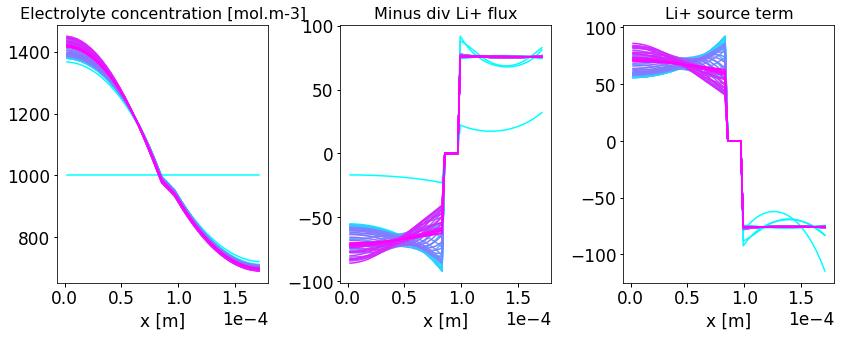

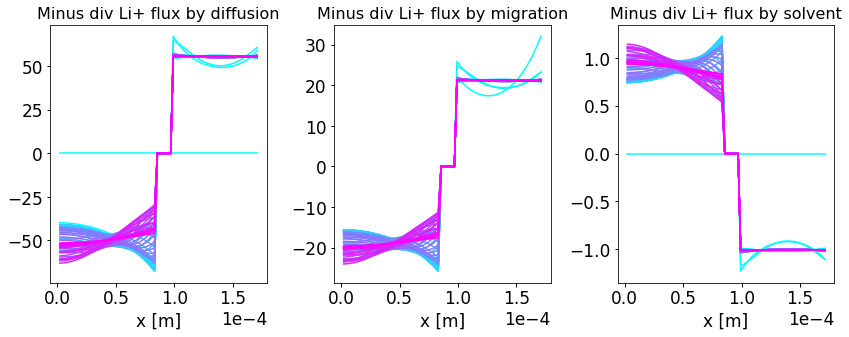

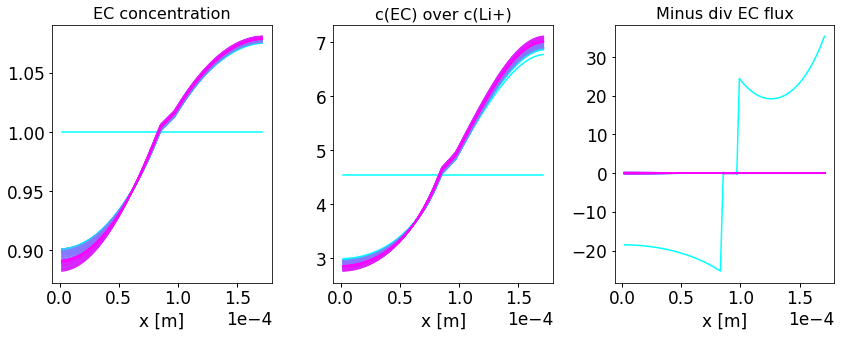

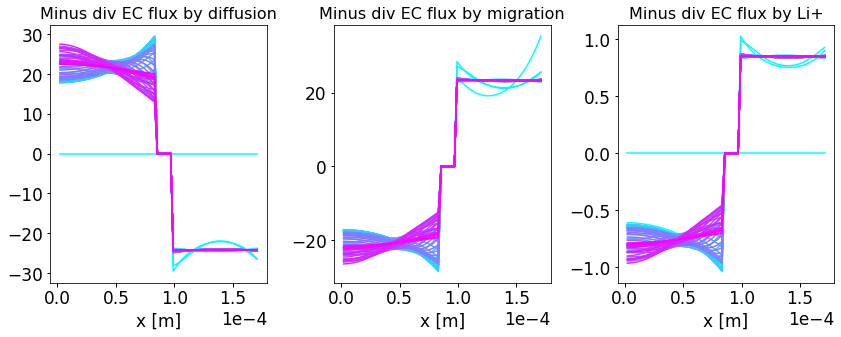

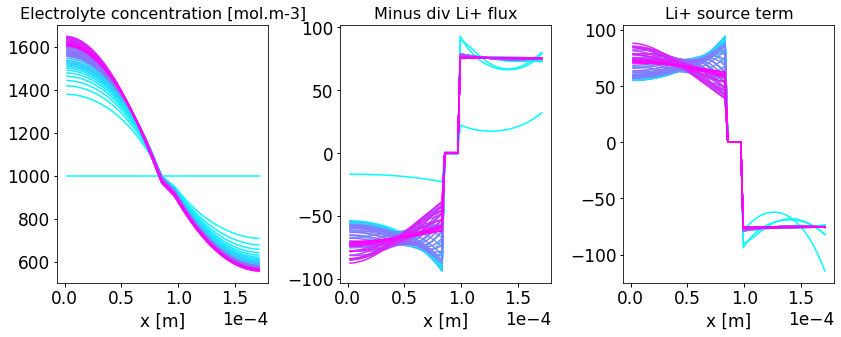

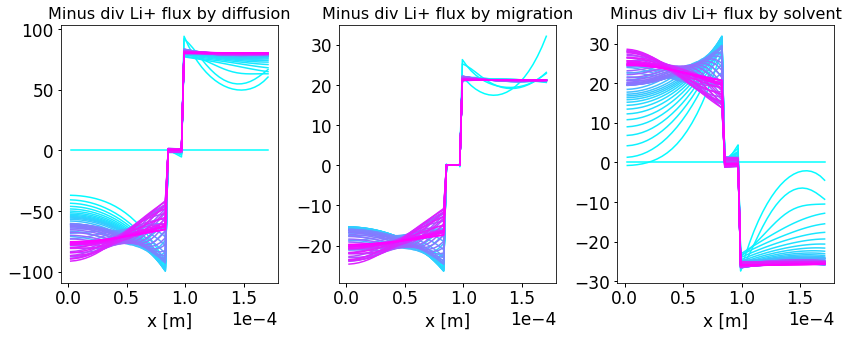

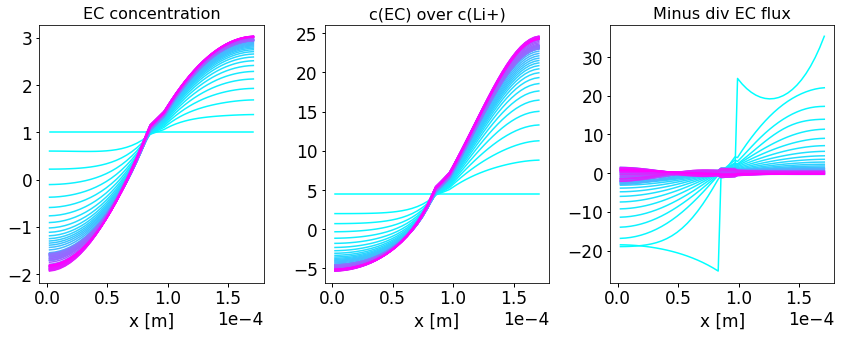

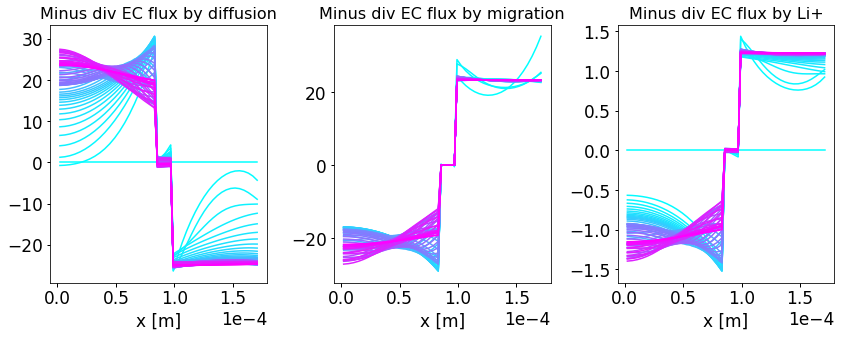

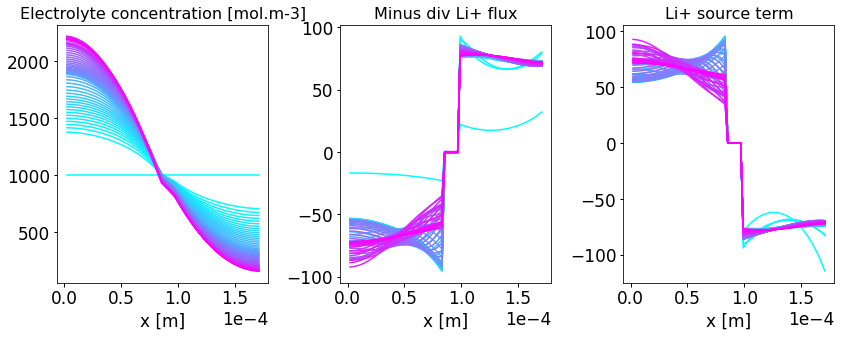

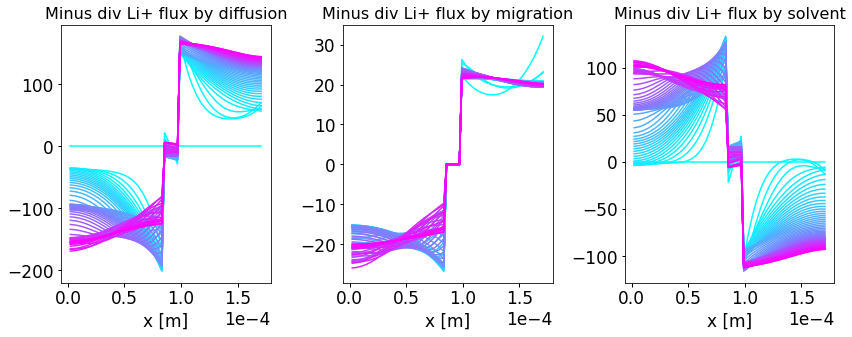

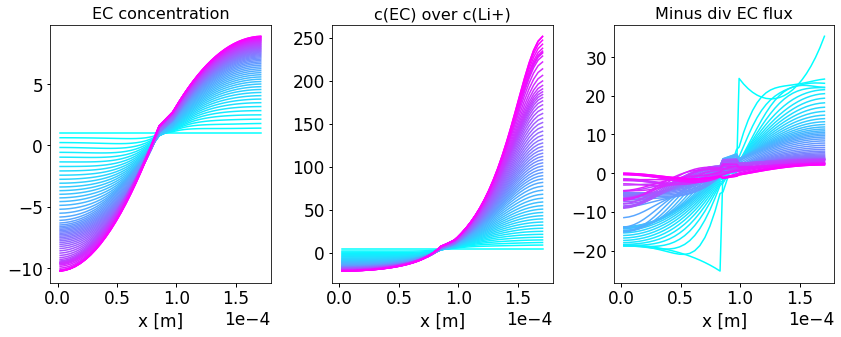

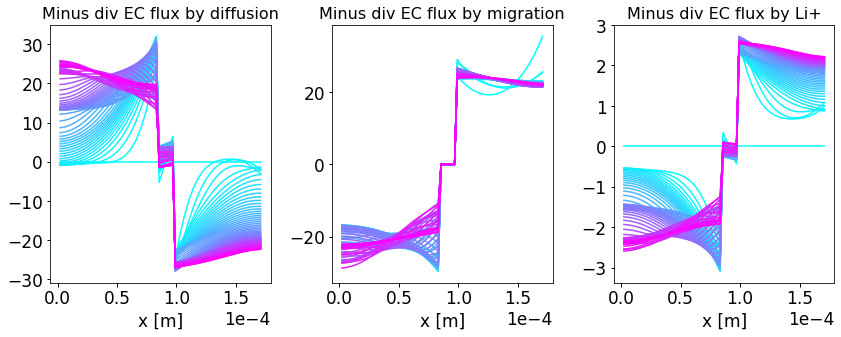

In [14]:
# static plot: loop all single case
cycle = 0; step_CD = 0;   step_CC = 1; step_CV = 2; 
Plot_Single_Static(
    Sol,"Dec",cycle, step_CD, 
    Dec_all,BasicPath , 
    Target,"True",'cool',17,200)
